In [91]:
!pip install graphviz

# Lesson 06 Assignment :
Author: Ajai Shukla

Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the Bank Data csv file, create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:

    Read in, parse, and pre-process the data
    Perform a brief exploratory analysis
    Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
    Graph the structure of your decision tree
    Graph the confusion matrix of your random forest model


 Read in, parse, and pre-process the data

In [7]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy
import sklearn.linear_model as linear
import random
sns.set(style="darkgrid")
import os,sys
import xlrd
import math
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import datetime
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import pylab as p
from sklearn import tree
from io import BytesIO as StringIO
from IPython.display import Image
import pydotplus
from IPython.display import Image  
import pydotplus
from io import BytesIO as StringIO
import graphviz
import copy
from copy import deepcopy
from numpy import random as np_random
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

In [11]:

dataframe = pd.read_csv(r"C:\Users\ashukla\Documents\DS\BankData.csv", header=0)

print(dataframe.shape) # prints data shape
print(dataframe.columns) # print columns
dataframe.head()

(600, 11)
Index(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'],
      dtype='object')


age     sex      region   income married  children  car save_act  \
0   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

  current_act mortgage  pep  
0          NO       NO  YES  
1         YES      YES   NO  
2         YES       NO   NO  
3         YES       NO   NO  
4          NO       NO   NO

In [12]:
#dataframe = pd.read_csv(r"C:\Users\ashukla\Documents\DS\BankData1.csv")
#print (dataframe.info())
#dataframe.head(5)

In [13]:
dataframe.columns.values


array(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'], dtype=object)

In [14]:
def examine_data_frame( df):
    for name in df.columns:
        print ("----------")
        print (df[ name].dtype)
        if df[ name].dtype is np.dtype( 'O'):
            print (df[ name].value_counts())
            print ("Name: ", name)
        else:
            print (df[ name].describe())

examine_data_frame(dataframe)


----------
int64
count    600.000000
mean      42.395000
std       14.424947
min       18.000000
25%       30.000000
50%       42.000000
75%       55.250000
max       67.000000
Name: age, dtype: float64
----------
object
FEMALE    300
MALE      300
Name: sex, dtype: int64
Name:  sex
----------
object
INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64
Name:  region
----------
float64
count      600.000000
mean     27524.031217
std      12899.468246
min       5014.210000
25%      17264.500000
50%      24925.300000
75%      36172.675000
max      63130.100000
Name: income, dtype: float64
----------
object
YES    396
NO     204
Name: married, dtype: int64
Name:  married
----------
int64
count    600.000000
mean       1.011667
std        1.056752
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: children, dtype: float64
----------
object
NO     304
YES    296
Name: car, dtype: int64
Name: 

3. Conducting EDA on the raw data. What conclusions did I reach?

In [15]:
cols =['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep']
data_1 = dataframe[cols]
data_dummies = pd.get_dummies(data_1)
result_df = pd.concat([data_dummies, dataframe], axis=1)
result_df.head()

age   income  children  sex_FEMALE  sex_MALE  region_INNER_CITY  \
0   48  17546.0         1           1         0                  1   
1   40  30085.1         3           0         1                  0   
2   51  16575.4         0           1         0                  1   
3   23  20375.4         3           1         0                  0   
4   57  50576.3         0           1         0                  0   

   region_RURAL  region_SUBURBAN  region_TOWN  married_NO  ...     sex  \
0             0                0            0           1  ...  FEMALE   
1             0                0            1           0  ...    MALE   
2             0                0            0           0  ...  FEMALE   
3             0                0            1           0  ...  FEMALE   
4             1                0            0           0  ...  FEMALE   

       region   income  married  children  car  save_act  current_act  \
0  INNER_CITY  17546.0       NO         1   NO        NO           NO   
1        TOWN  30085.1      YES         3  YES        NO          YES   
2  INNER_CITY  16575.4      YES         0  YES       YES          YES   
3        TOWN  20375.4      YES         3   NO        NO          YES   
4       RURAL  50576.3      YES         0   NO       YES           NO   

   mortgage  pep  
0        NO  YES  
1       YES   NO  
2        NO   NO  
3        NO   NO  
4        NO   NO  

[5 rows x 32 columns]

In [16]:
result_df.columns.values # Performed one-hot encoding so that I can use it in EDA

array(['age', 'income', 'children', 'sex_FEMALE', 'sex_MALE',
       'region_INNER_CITY', 'region_RURAL', 'region_SUBURBAN',
       'region_TOWN', 'married_NO', 'married_YES', 'car_NO', 'car_YES',
       'save_act_NO', 'save_act_YES', 'current_act_NO', 'current_act_YES',
       'mortgage_NO', 'mortgage_YES', 'pep_NO', 'pep_YES', 'age', 'sex',
       'region', 'income', 'married', 'children', 'car', 'save_act',
       'current_act', 'mortgage', 'pep'], dtype=object)

In [17]:
result_df['output'] = result_df['pep'].apply(lambda x: 1 if x =='yes' else 0)


1) Comparing Qualitative vs. Quantitative Analysis
1.1 income vs. Output

In [26]:
grouped = result_df.groupby( "pep")
pep = grouped[ "pep"].describe()
income = income.unstack( level=-1)
print (income)

pep                     NO           YES
income count    326.000000    274.000000
       mean   24900.953374  30644.919453
       std    11661.123422  13609.613043
       min     5014.210000   7756.360000
       25%    15366.475000  19639.475000
       50%    23105.000000  28080.050000
       75%    31210.900000  38458.350000
       max    61554.600000  63130.100000
       count    326.000000    274.000000
       mean   24900.953374  30644.919453
       std    11661.123422  13609.613043
       min     5014.210000   7756.360000
       25%    15366.475000  19639.475000
       50%    23105.000000  28080.050000
       75%    31210.900000  38458.350000
       max    61554.600000  63130.100000


Conclusion:
income (mean) is less for output-yes which suggests that higher number of person (income) have negative impact on output

 Pep vs. output

In [19]:
grouped = result_df.groupby( "pep")
age = grouped[ "age"].describe()
age = age.unstack( level=-1)
print (age)

            pep
age  count  NO     326.000000
            YES    274.000000
     mean   NO      40.098160
            YES     45.127737
     std    NO      14.123506
            YES     14.327991
     min    NO      18.000000
            YES     18.000000
     25%    NO      27.000000
            YES     34.000000
     50%    NO      40.000000
            YES     45.000000
     75%    NO      51.000000
            YES     58.000000
     max    NO      67.000000
            YES     67.000000
     count  NO     326.000000
            YES    274.000000
     mean   NO      40.098160
            YES     45.127737
     std    NO      14.123506
            YES     14.327991
     min    NO      18.000000
            YES     18.000000
     25%    NO      27.000000
            YES     34.000000
     50%    NO      40.000000
            YES     45.000000
     75%    NO      51.000000
            YES     58.000000
     max    NO      67.000000
            YES     67.000000
dtype: float64


Conclusion:

    Number of person -Age (mean) is less for output-yes which suggests that higher number of age have negative impact on output

age vs. output


In [20]:
grouped = result_df.groupby( "pep")
age = grouped[ "age"].describe()
age = age.unstack( level=-1)
print (age)

            pep
age  count  NO     326.000000
            YES    274.000000
     mean   NO      40.098160
            YES     45.127737
     std    NO      14.123506
            YES     14.327991
     min    NO      18.000000
            YES     18.000000
     25%    NO      27.000000
            YES     34.000000
     50%    NO      40.000000
            YES     45.000000
     75%    NO      51.000000
            YES     58.000000
     max    NO      67.000000
            YES     67.000000
     count  NO     326.000000
            YES    274.000000
     mean   NO      40.098160
            YES     45.127737
     std    NO      14.123506
            YES     14.327991
     min    NO      18.000000
            YES     18.000000
     25%    NO      27.000000
            YES     34.000000
     50%    NO      40.000000
            YES     45.000000
     75%    NO      51.000000
            YES     58.000000
     max    NO      67.000000
            YES     67.000000
dtype: float64



Conclusion:

    PDays (mean) is less for output-yes which suggests that higher higher 'pdays' have negative impact on output, which makes sense. Higher 'pdays' i.e. more number of days that passed by after the client was last contacted from a previous campaign, lesser will be chances for bank trem deposits

2 Qualitative vs. Qualitative
2.1 Month vs. Output

pep               NO       YES
region                        
INNER_CITY  0.243333  0.205000
RURAL       0.083333  0.076667
SUBURBAN    0.046667  0.056667
TOWN        0.170000  0.118333


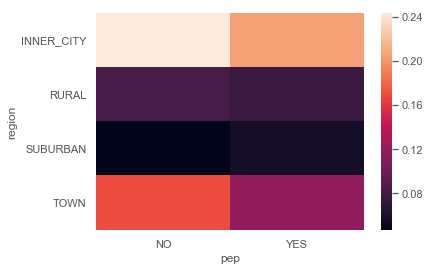

In [21]:
frequencies = pd.crosstab( result_df[ "region"], result_df[ "pep"]).apply(lambda r: r/len(result_df))
print (frequencies)

sns.heatmap( frequencies)

Conclusion:

    Month of May, Jun, July, August & November have negative impact on the output

4.This is a binary classification task. Picking an appropriate evaluation metric and explain to me the pros and cons.

    It really depends on "goal" and dataset. Classification Accuracy (or misclassification error) makes sense if your class labels are uniformly distributed. Even better, we can compute the ROC area under the curve (even for multi-class sytems)

    Similarly, we can generalize all the binary performance metrics such as precision, recall, and F1-score etc. to multi-class settings.

    I have selected accurary to be the evaluation metric, since at this point true cost (of misclassification) of false positive or false negatives are not known.

    Cons can be precision, recall or other metrics could be more important for business impact.

5. Using Decision Tree. Build a model using three rounds of 10 fold cross validation or 30 repetitions of bootstrap sampling with 90/10 splits to gauge the generalization error of your model using the evaluation metric you picked.


In [22]:
def error_rate(true_class_data, prediction_model_data):
    fp=0.0
    fn=0.0
    for t, p in zip(true_class_data, prediction_model_data):
        if t==0 and p==1:
            fp=fp+1
        elif t==1 and p==0:
            fn=fn+1
    return (fp+fn)/len(true_class_data)

def cross_validate_10_fold( X, y, model):
    ret_scores=[]
    data
    for n in xrange(3):
        model = tree.DecisionTreeClassifier(class_weight="balanced").fit( X, y)

        # Evaluate the models using crossvalidation
        scores = 1-cross_validation.cross_val_score(model, X, y, scoring="accuracy", cv=10)
        for s in scores:
            ret_scores.append(s)
    sample_thetas=non_param_bootstrap(scores, 10000)
    ci=stats.mstats.mquantiles( sample_thetas, [0.05, 0.95])
    return ci

def resample( data):
    n = len( data)
    return [ data[ i] for i in [np_random.randint(0, n - 1) for _ in xrange( 0, n)]]

def non_param_bootstrap(original_data, num_sampling):
    return np.array( [np.mean( sample) for sample in [resample(original_data) for i in xrange( 0, num_sampling)]])

In [25]:
result_df2 = result_df[['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep']]
y = result_df2[output].values
X = result_df2[['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep']].values

NameError: name 'output' is not defined

In [24]:
np_random.seed(1)
ret_scores=[]


In [27]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = tree.DecisionTreeClassifier(class_weight = "balanced").fit( X_train, y_train)


ValueError: could not convert string to float: 'MALE'

In [ ]:
    
    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(model, X_test, y_test, scoring="accuracy", cv =10)
    for s in scores:
        ret_scores.append(s)
sample_thetas_1=non_param_bootstrap(scores, 10000)
ci_1=stats.mstats.mquantiles( sample_thetas_1, [0.05, 0.95])